# GRIP Data Analytics

# Task2 Predictions using unsupervised Learning

## KMeans clustering is a technique for unsupervised learning where we r not aware of our independent variables and target variables.The predictions are done based on features.We try to create different clusters and combine the values based on characteristics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Iris Data.csv')
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:xlabel='class', ylabel='count'>

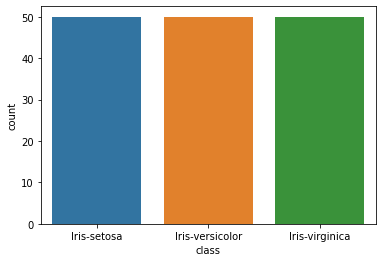

In [4]:
sns.countplot(x='class',data=df)

# We use elbow method to determine the number of clusters to be formed.

# The technique we use for the same is through Sum of Squared error.

In [5]:
k_rng=range(1,10)
sse=[] 
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']])
    sse.append(km.inertia_)#The inertia is a method in KMeans which tells us about the sum of squared error

In [6]:
sse

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.226244101244106,
 34.35601673815633,
 30.186555194805194,
 27.78726218956482]

# Plotting the above shall give a pictorial representation of an elbow

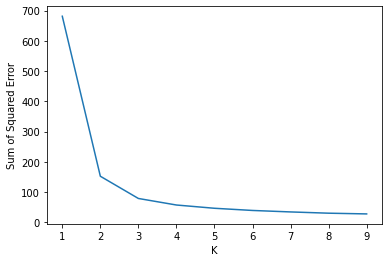

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)

# The suitable number of clusters that are to be formed are three

In [8]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted=km.fit_predict(df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
df['cluster']=y_predicted
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [11]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

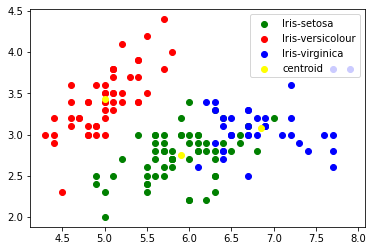

In [12]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['sepal length in cm'],df1['sepal width in cm'],color='green',label='Iris-setosa')
plt.scatter(df2['sepal length in cm'],df2['sepal width in cm'],color='red',label='Iris-versicolour')
plt.scatter(df3['sepal length in cm'],df3['sepal width in cm'],color='blue',label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='o',label='centroid')
plt.legend(loc=1)